#  CDS 468 Final - Fall 2024

<br><br>

<b>This is a take home final</b><br><br>

<b>You will have 7 days to complete the exam</b><br><br>

<b>The exam has been made available on 11/28/2024 at 4:30 pm Eastern; you will have until 12/5/2024 4:30 pm Eastern to submit the exam on Blackboard</b><br><br>

<b>If the exam is not submitted by 12/5/2024 4:30 pm Eastern on Blackboard, then the final exam will be awarded a zero</b><br><br>

<br><br>

<b>Your answers should include the appropriate code and rationale (thought process/text) for the answer</b><br><br>

<b>Your code should be based on what we have used in our lectures and homework assignments</b><br><br>

<b>Use of GPT or any derivative in any form is not allowed. It's use is easily observed</b><br><br>

<b>Use good sound scientific principles is key</b><br><br>

<br><br>

## Question 1

<br>

What is the value of $t$ in,

$t=\sum_{\vec{x}} \mathbf{o}_{\vec{w}, \vec{v}, r}$

where $\vec{w}=(200,200), \vec{v}=(100,100)$ and $r=150$?
    
<br><br>

## Answer for Question 1
<br>


<br><br><br><br>

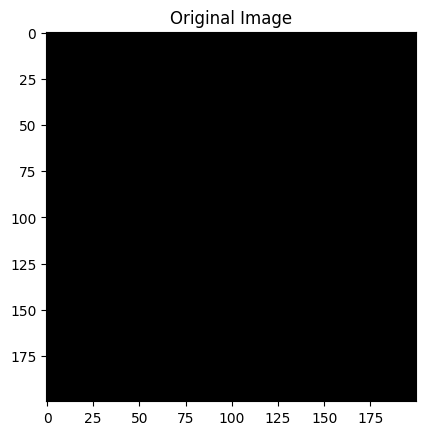

40000


'\nIt seems since the diameter of the circle is greater than the size of the frame of the image, the whole image, 200x200 is black so t = 40,000\n'

In [1]:
"""
The o operator creates a circle on a frame 200x200, at position (100,100) with a radius of 150.
Then we want to add up the values of the pixels in the circle contained in the 200x200 frame.
"""

import matplotlib.pyplot as plt
import numpy as np

def Circle(size, loc, rad):
    """frame, center, radius size is (v,h) of size of array loc is (v,h) of circle location
    rad is integer of radius returns array with a solid circle"""
    b1,b2 = np.indices(size)
    b1,b2 = b1-loc[0], b2-loc[1]
    mask = b1*b1 + b2*b2
    mask = (mask <= rad*rad).astype(int)
    return mask

adata = Circle((200,200),(100,100),150)

plt.title('Original Image')
plt.imshow(adata, cmap='gray')
plt.show()

t = np.sum(adata)

print(t)

'''
It seems since the diameter of the circle is greater than the size of the frame of the image, the whole image, 200x200 is black so t = 40,000
'''

## Question 2

<br>

Load the horse image (horse.jpg) as a grayscale image. Invert the grayscale colors of the image. Use the ndimage.binary_dilation function to remove the line through the middle of the horse. The resulting horse image should be white on a black background.

<br><br>

## Answer for Question 2

<br><br>

<ipython-input-19-b9035d2faea8>:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  amg = imageio.imread(url, mode='F').astype(np.uint8)


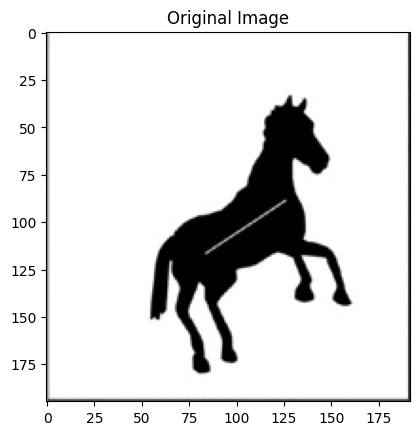

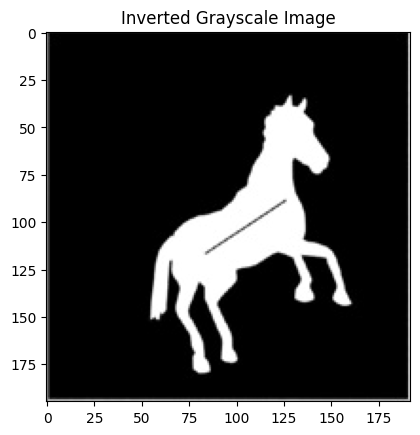

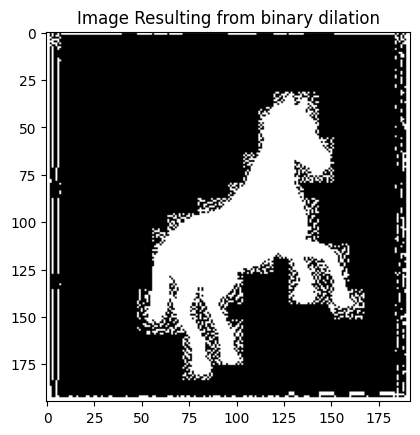

In [19]:
"""
1. Load in horse img as grayscale, show img
2. Invert the grayscale colors, show img
3. Use ndimage.binary_dilation to remove the line in the middle of the horse, show img
"""

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as nd
import imageio

url = 'https://raw.githubusercontent.com/ewu22gmu/CDS468Final/refs/heads/main/Q2_horse.jpg'
amg = imageio.imread(url, mode='F').astype(np.uint8)

plt.title('Original Image')
plt.imshow(amg, cmap='gray')
plt.show()

#Invert grayscale
bmg = 255-amg
plt.title('Inverted Grayscale Image')
plt.imshow(bmg, cmap='gray')
plt.show()

#Use binary_dilation to remove the line
cmg = nd.binary_dilation(bmg, structure = np.array([[1]]), iterations=1)

plt.title('Image Resulting from binary dilation')
plt.imshow(cmg, cmap='gray')
plt.show()

<br><br><br><br>

## Question 3

<br>

If color conversions were lossless, then the conversion from one space and then back to the original should produce exactly the same image as the original. Demonstrate that the color conversion process does loose some information by employing the following operations on the RGB color bird image (bird.jpg), $\mathbf{a}[\vec{x}]$.

$\mathbf{b}[\vec{x}]=\left|\left(\mathcal{L}_{\mathrm{RGB}} \mathcal{L}_{\mathrm{YIQ}} \mathbf{a}[\vec{x}]\right)-\mathbf{a}[\vec{x}]\right|$

<br><br>

## Answer for Question 3

<br><br>

<ipython-input-7-b37f57773123>:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  adata = imageio.imread(url)


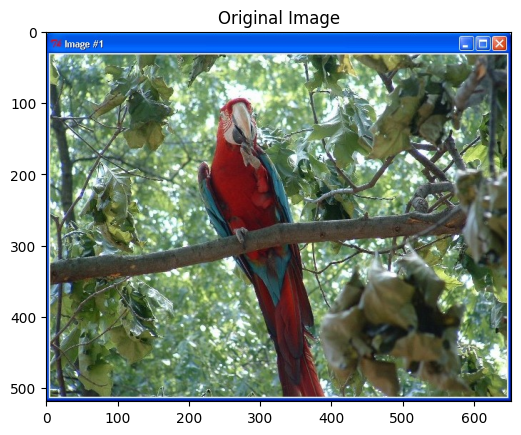

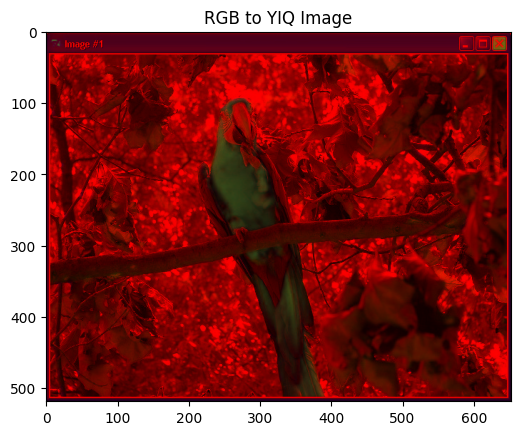

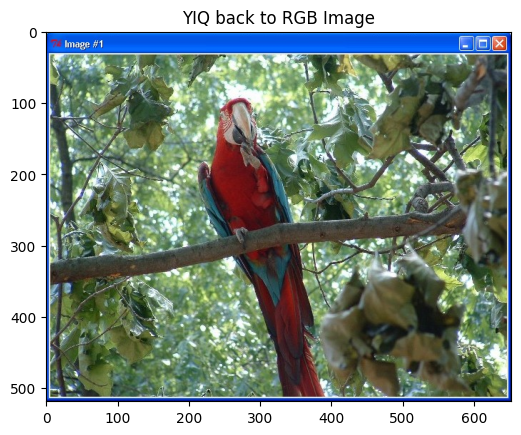

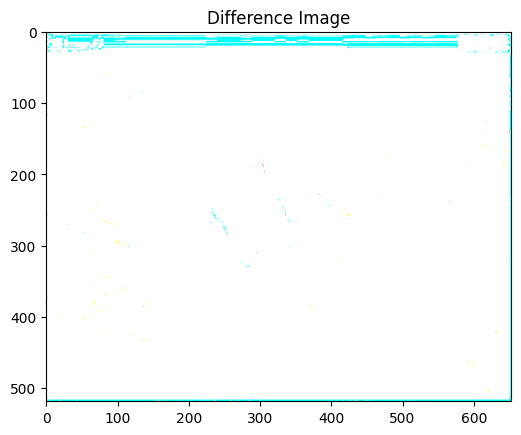

The images are not equal


In [7]:
"""
Add code here
"""

%matplotlib inline
import imageio
import matplotlib.pyplot as plt
from skimage import color

#import image
url = 'https://raw.githubusercontent.com/ewu22gmu/CDS468Final/refs/heads/main/Q3_bird.jpg'
adata = imageio.imread(url)

#show og image
plt.title('Original Image')
plt.imshow(adata)
plt.show()

#convert og image to YIQ color space
yiq = color.rgb2yiq(adata)
plt.title('RGB to YIQ Image')
plt.imshow(yiq)
plt.show()

#convert yiq image back to rgb
rgb = color.yiq2rgb(yiq)
plt.title('YIQ back to RGB Image')
plt.imshow(rgb)
plt.show()

#show the difference image
bdata = np.abs(color.yiq2rgb(color.rgb2yiq(adata))-adata)
plt.title('Difference Image')
plt.imshow(bdata)
plt.show()

#test if the color converted image and orginal image are equal
print('The images are the same' if np.array_equal(color.yiq2rgb(color.rgb2yiq(adata)),adata) else 'The images are not equal')

The color conversion is not lossless. If it were, the difference image of the two should be blank

<br><br><br><br>

## Question 4

<br>

Write a script that will rotate the color image of the bird (Q3_bird.jpg) 20 degrees CCW about the center of the beak (use (300,125) for the beak location) without reshape.

<br><br>

## Answer for Question 4

<br><br>

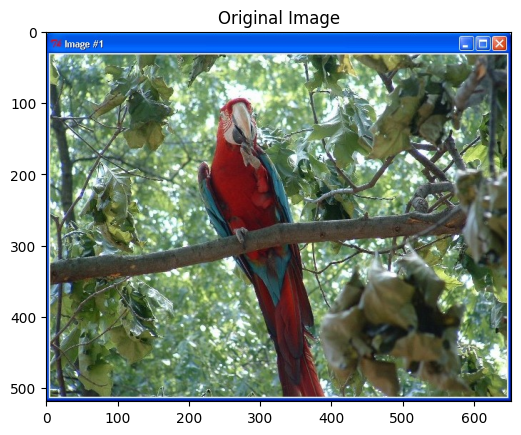

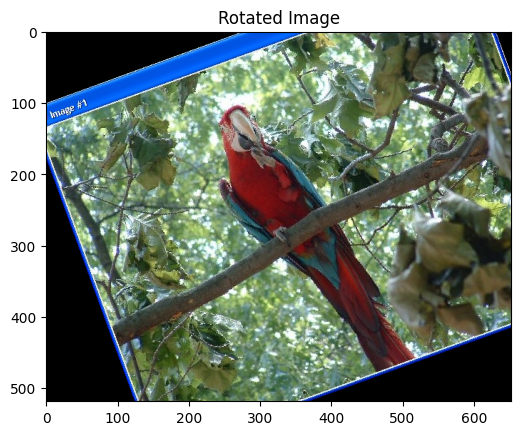

In [8]:
import matplotlib.pyplot as plt
from PIL import Image
from urllib.request import urlopen

#import image
url = 'https://raw.githubusercontent.com/ewu22gmu/CDS468Final/refs/heads/main/Q3_bird.jpg'
amg = Image.open(urlopen(url))

#show og image
plt.title('Original Image')
plt.imshow(amg)
plt.show()

#rotate the image
bmg = amg.rotate(20,center=(300,125))

#show rotated image
plt.title('Rotated Image')
plt.imshow(bmg)
plt.show()

<br><br><br><br>

## Question 5

<br>

Use the dog image (Q5_dog.jpg) to preform the following actions. Note that this is a color image so you will have to perform the PCA analysis process on each channel: fit and inverse transform. Perform the following PCA analysis:

1. Preform a PCA using the first 20 components. Show the resulting image.
2. Perform a PCA using the first 100 components. Show the resulting image.

<br><br>

## Answer for Question 5

<br><br><br><br>

<ipython-input-9-0a54988ee8f2>:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  adata = imageio.imread(url)


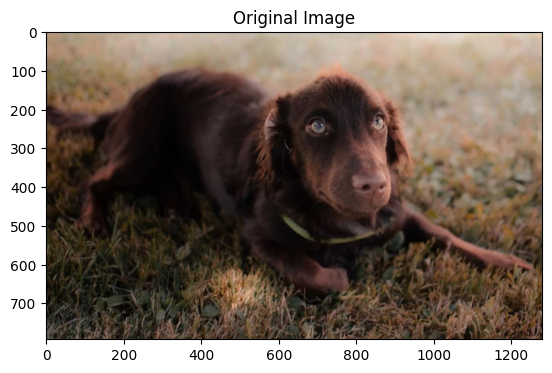

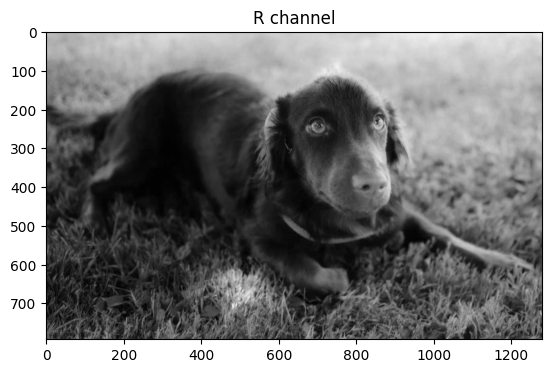

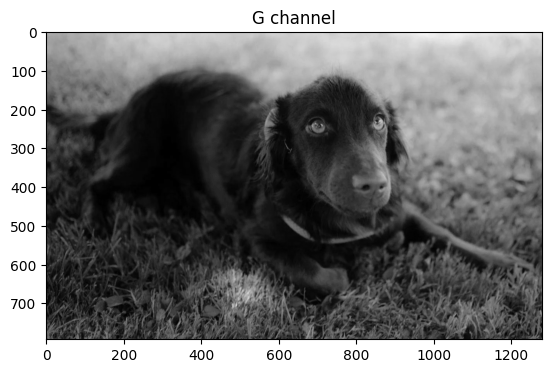

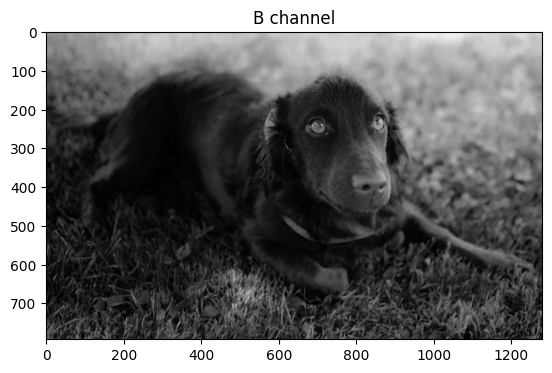

In [9]:
"""
Add code here
"""
import matplotlib.pyplot as plt
import imageio
import numpy as np
import warnings
from urllib.request import urlopen
warnings.filterwarnings("ignore", category=RuntimeWarning) #get rid of error message

#import image
url = 'https://raw.githubusercontent.com/ewu22gmu/CDS468Final/refs/heads/main/Q5_dog.jpg'
adata = imageio.imread(url)

#show og image
plt.title('Original Image')
plt.imshow(adata)
plt.show()

#break out the color channels of the image
r,g,b = adata[:,:,0],adata[:,:,1],adata[:,:,2]

#view each color channel
plt.title('R channel')
plt.imshow(r,cmap='gray')
plt.show()

plt.title('G channel')
plt.imshow(g,cmap='gray')
plt.show()

plt.title('B channel')
plt.imshow(b,cmap='gray')
plt.show()

from sklearn.decomposition import PCA


Expained Variance Ratio Rchannel: 0.96169

Expained Variance Ratio Gchannel: 0.96422

Expained Variance Ratio Bchannel: 0.96422


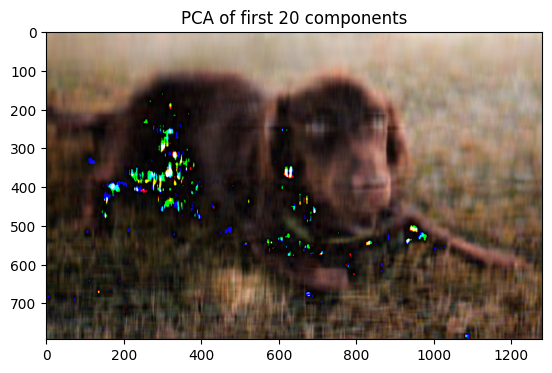

In [10]:
#Preform a PCA using the first 20 components. Show the resulting image.

#Create PCA objects for each channel
PCA20r = PCA(n_components=20)
PCA20r.fit(r)

PCA20g = PCA(n_components=20)
PCA20g.fit(g)

PCA20b = PCA(n_components=20)
PCA20b.fit(b)


print('\nExpained Variance Ratio Rchannel:', round(sum(PCA20r.explained_variance_ratio_),5))

print('\nExpained Variance Ratio Gchannel:', round(sum(PCA20g.explained_variance_ratio_),5))

print('\nExpained Variance Ratio Bchannel:', round(sum(PCA20g.explained_variance_ratio_),5))

#reduce dimensions of the original image to 20 components per channel
PCA20r_filtered = PCA20r.inverse_transform(PCA20r.transform(r))
PCA20g_filtered = PCA20g.inverse_transform(PCA20g.transform(g))
PCA20b_filtered = PCA20b.inverse_transform(PCA20b.transform(b))

'''plt.imshow(PCA20r.inverse_transform(PCA20r.transform(r)),cmap='gray')
plt.title('R channel first 20 components')
plt.show()'''

#recombine the color channels and show resulting image
PCA20 = np.stack([PCA20r_filtered,PCA20g_filtered,PCA20b_filtered],axis=2)
plt.imshow(PCA20.astype(np.uint8))
plt.title('PCA of first 20 components')
plt.show()


Expained Variance Ratio Rchannel: 0.99766

Expained Variance Ratio Gchannel: 0.9974

Expained Variance Ratio Bchannel: 0.9974


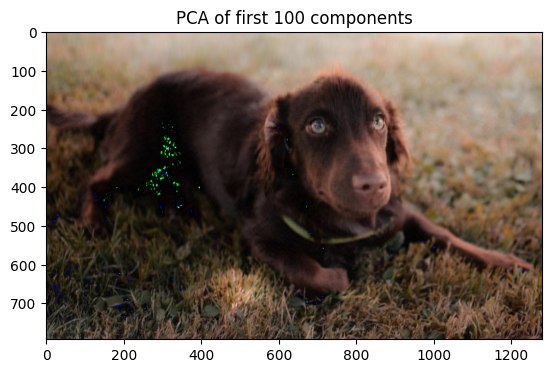

In [11]:
#Preform a PCA using the first 100 components. Show the resulting image.

#Create PCA objects for each channel
PCA100r = PCA(n_components=100)
PCA100r.fit(r)

PCA100g = PCA(n_components=100)
PCA100g.fit(g)

PCA100b = PCA(n_components=100)
PCA100b.fit(b)


print('\nExpained Variance Ratio Rchannel:', round(sum(PCA100r.explained_variance_ratio_),5))

print('\nExpained Variance Ratio Gchannel:', round(sum(PCA100g.explained_variance_ratio_),5))

print('\nExpained Variance Ratio Bchannel:', round(sum(PCA100g.explained_variance_ratio_),5))

#reduce dimensions of the original image to 100 components per channel
PCA100r_filtered = PCA100r.inverse_transform(PCA100r.transform(r))
PCA100g_filtered = PCA100g.inverse_transform(PCA100g.transform(g))
PCA100b_filtered = PCA100b.inverse_transform(PCA100b.transform(b))

'''plt.imshow(PCA100r.inverse_transform(PCA100r.transform(r)),cmap='gray')
plt.title('R channel first 100 components')
plt.show()'''

#recombine the color channels and show resulting image
PCA100 = np.stack([PCA100r_filtered,PCA100g_filtered,PCA100b_filtered],axis=2)
plt.imshow(PCA100.astype(np.uint8))
plt.title('PCA of first 100 components')
plt.show()

<br><br><br><br>

## Question 6

<br>

![p6.jpg](attachment:p6.jpg)

<br>

Consider the data similar to the figure above. Use coordinates (-2,0), (-1,0), (0,0), (1,0), and (2,0) for the points. Compute the covariance matrix for this data. (The covariance matrix should be 2x2.)

<br><br>

## Answer for Question 6

<br><br>

In [12]:
"""
Add code here
"""
import numpy as np

#set the matrix
matx = np.array([[-2,-1,0,1,2],[0,0,0,0,0]])
print('Original Matrix \n', matx)

#compute and output the covariance matrix
newmatx = np.cov(matx)
print('Cov Matrix \n', newmatx)

Original Matrix 
 [[-2 -1  0  1  2]
 [ 0  0  0  0  0]]
Cov Matrix 
 [[2.5 0. ]
 [0.  0. ]]


<br><br><br><br>

## Question 7

<br>

Calculate the eigenvalues and eigenvectors for the image in Q7_pca.png. First resize the image to 300 by 300. Print out the first eigenvalue and the first eigenvector.

<br><br>

## Answer for Question 7

<br><br>

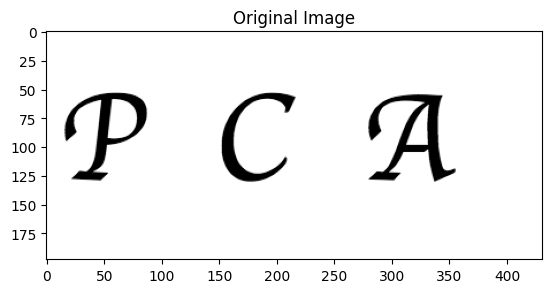

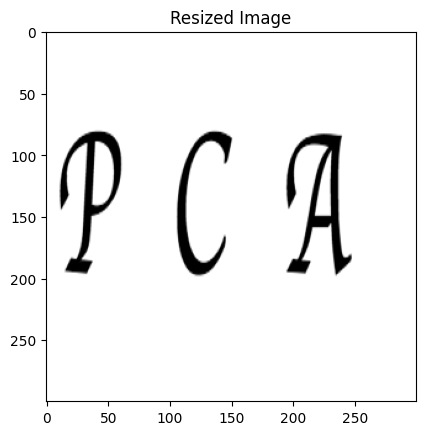


The first eigenvalue:
 (72280.73220601921+0j)

The first eigenvector:
 [0.06090976+0.j 0.06090976+0.j 0.06090976+0.j 0.06090976+0.j
 0.06090976+0.j 0.06090976+0.j 0.06090976+0.j 0.06090976+0.j
 0.06090976+0.j 0.06090976+0.j 0.06090976+0.j 0.06090976+0.j
 0.06090976+0.j 0.06090976+0.j 0.06090976+0.j 0.06090976+0.j
 0.06090976+0.j 0.06090976+0.j 0.06090976+0.j 0.06090976+0.j
 0.06090976+0.j 0.06090976+0.j 0.06090976+0.j 0.06090976+0.j
 0.06090976+0.j 0.06090976+0.j 0.06090976+0.j 0.06090976+0.j
 0.06090976+0.j 0.06090976+0.j 0.06090976+0.j 0.06090976+0.j
 0.06090976+0.j 0.06090976+0.j 0.06090976+0.j 0.06090976+0.j
 0.06090976+0.j 0.06090976+0.j 0.06090976+0.j 0.06090976+0.j
 0.06090976+0.j 0.06090976+0.j 0.06090976+0.j 0.06090976+0.j
 0.06090976+0.j 0.06090976+0.j 0.06090976+0.j 0.06090976+0.j
 0.06090976+0.j 0.06090976+0.j 0.06090976+0.j 0.06090976+0.j
 0.06090976+0.j 0.06090976+0.j 0.06090976+0.j 0.06090976+0.j
 0.06090976+0.j 0.06090976+0.j 0.06090976+0.j 0.06090976+0.j
 0.06090976+0

In [14]:
"""
Add code here
"""
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from urllib.request import urlopen

#import image
url = 'https://raw.githubusercontent.com/ewu22gmu/CDS468Final/refs/heads/main/Q7_pca.png'
amg = Image.open(urlopen(url)).convert('L')

#show og image
plt.imshow(amg,cmap='gray')
plt.title('Original Image')
plt.show()

#resize image
amg = amg.resize((300,300))

plt.imshow(amg,cmap='gray')
plt.title('Resized Image')
plt.show()

#find first eigen value and eigenvector
from numpy import linalg as LA

adata = np.array(amg)
evl, evc = LA.eig(adata)

print('\nThe first eigenvalue:\n', evl[0])
print('\nThe first eigenvector:\n', evc[:,0])

In [15]:
#test if eigenvector is orthogonal
print('it is orthonormal' if round(np.dot(evc[:,0],evc[:,0]),2)==1 else 'it is not orthonormal')

#test if eigenvector is orthogonal
print(np.dot(evc[:,0],evc[:,0]))

it is orthonormal
(1.0000000000000027+0j)


<ipython-input-15-07b50d94efaa>:2: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  print('it is orthonormal' if round(np.dot(evc[:,0],evc[:,0]),2)==1 else 'it is not orthonormal')


<br><br><br><br>

## Question 8

<br>

Start with the bird image (Q3_bird.jpg) $\mathbf{a}[\vec{x}]$, compute $\mathbf{b}[\vec{x}]=\mathfrak{F}^{-1} \mathfrak{F} \mathbf{a}[\vec{x}]$. Show that the $\sum_{\vec{x}}|\mathbf{a}[\vec{x}]-\mathbf{b}[\vec{x}]|$ is nearly 0.

<br><br>

## Answer for Question 8

<br><br>

<ipython-input-21-f9afecbda9b9>:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  adata = imageio.imread(url)


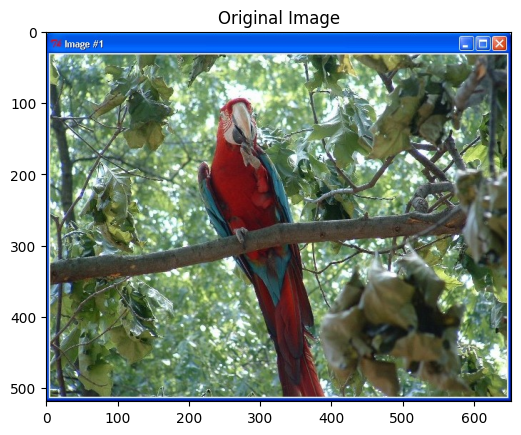

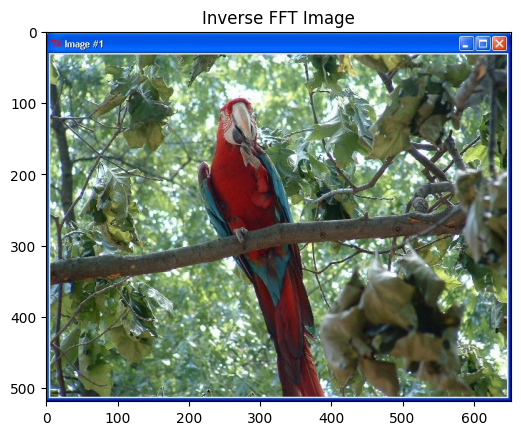

The difference is 0.0
The images are the same


In [21]:
"""
Add code here
"""
import matplotlib.pyplot as plt
import numpy as np
import imageio
import scipy.fftpack as ft

#import image
url = 'https://raw.githubusercontent.com/ewu22gmu/CDS468Final/refs/heads/main/Q3_bird.jpg'
adata = imageio.imread(url)

#show og image
plt.title('Original Image')
plt.imshow(adata)
plt.show()

#fourier transform than inverse fourier transform image
bdata = ft.ifft2(ft.fft2(adata)).real

#show fourier transformed than inverse fourier transformed image
plt.title('Inverse FFT Image')
plt.imshow(bdata.astype(np.uint8))
plt.show()

#show the differnece
diff = np.sum(np.abs(adata-bdata))
print('The difference is', round(diff,2))
print('The images are the same' if round(diff,2)==0 else 'The images are not the same')

The fourier transform is lossless as the diffrance is near zero

<br><br><br><br>

## Question 9

<br>

Create the kernel

$\mathbf{b}[\vec{x}]=\frac{1}{25}\left(\begin{array}{lllll}1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1\end{array}\right)$

<br><br>

Compute $\mathbf{c}[\vec{x}]=\mathbf{a}[\vec{x}] \otimes \mathbf{b}[\vec{x}]$, where $\mathbf{a}[\vec{x}]$ is the grayscale image of the bird image (Q3_bird.jpg). Explain what has occurred to the image.

<br><br>

## Answer for Question 9

<br><br>

<ipython-input-22-a973e8c3a501>:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  adata = imageio.imread(url, mode='F').astype(np.uint8)


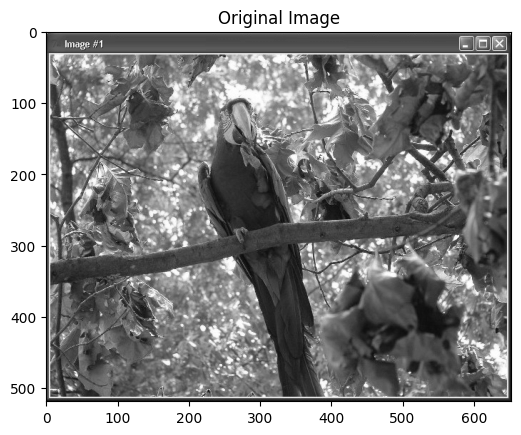

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


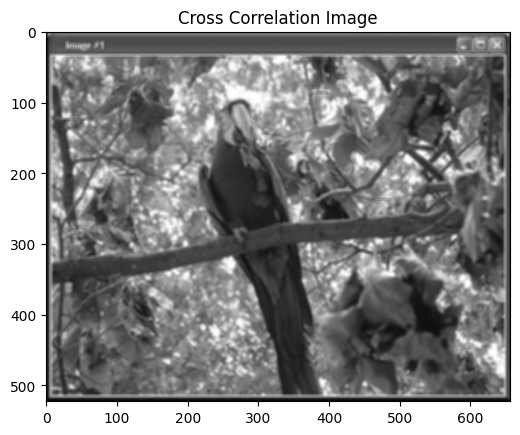

In [22]:
"""
Add code here
"""
import matplotlib.pyplot as plt
import numpy as np
import imageio
import scipy.signal as ss

#import image
url = 'https://raw.githubusercontent.com/ewu22gmu/CDS468Final/refs/heads/main/Q3_bird.jpg'
adata = imageio.imread(url, mode='F').astype(np.uint8)

#show og image
plt.title('Original Image')
plt.imshow(adata, cmap='gray')
plt.show()

#create kernel
bdata = np.ones((5,5))/25
print(bdata)

#perform crosscorrelation of image and kernal
cdata = ss.correlate2d(adata, bdata)

#display image resulting from cross-correlation
plt.title('Cross Correlation Image')
plt.imshow(cdata,cmap='gray')
plt.show()

It seems cross correlating the grayscale image of the bird and the 5x5 kernal of 1/25 has blurred the image

<br><br><br><br>

## Question 10

<br>

Use the tiger image (Q10_tiger.jpg) to create the following edge detected images.  First, apply a (3,3) Gaussian blur. Then, use the following openCV functions in order with the ksize=5 and CV_64F as a destination type.

1. cv2.Sobel dx=1, dy=0
2. cv2.Sobel dx=0, dy=1
3. cv2.Sobel dx=1, dy=1
4. cv2.Canny

Show initial image and the 4 resulting images.

<br><br>

## Answer for Question 10

<br><br>

<ipython-input-23-b9ddeb58f078>:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  amg = imageio.imread(url).astype(np.uint8)


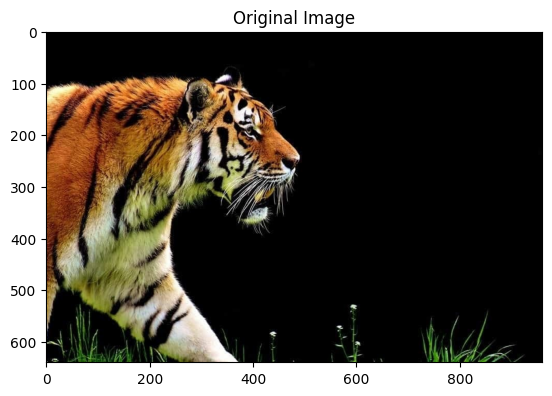

The gaussian blur was applied


In [23]:
"""
Add code here
"""
import matplotlib.pyplot as plt
import imageio
import cv2

#import image
url = 'https://raw.githubusercontent.com/ewu22gmu/CDS468Final/refs/heads/main/Q10_tiger.jpg'
amg = imageio.imread(url).astype(np.uint8)

#show og image
plt.imshow(amg)
plt.title('Original Image')
plt.show()

#apply a (3,3) gaussian blur
bmg = cv2.GaussianBlur(amg,(3,3),0)

'''plt.imshow(bmg)
plt.title('Blurred Image')
plt.show()'''

#test if blur was applied
print('The gaussian blur was not applied' if np.array_equal(amg,bmg) else 'The gaussian blur was applied')

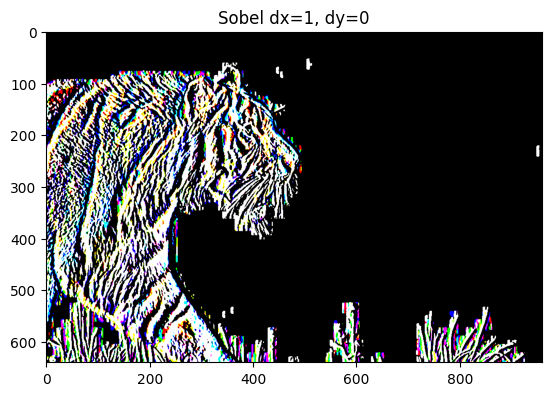

In [24]:
#cv2.Sobel dx=1, dy=0
sob_x = cv2.Sobel(bmg,cv2.CV_64F,1,0,ksize=5)

plt.imshow(sob_x)
plt.title('Sobel dx=1, dy=0')
plt.show()

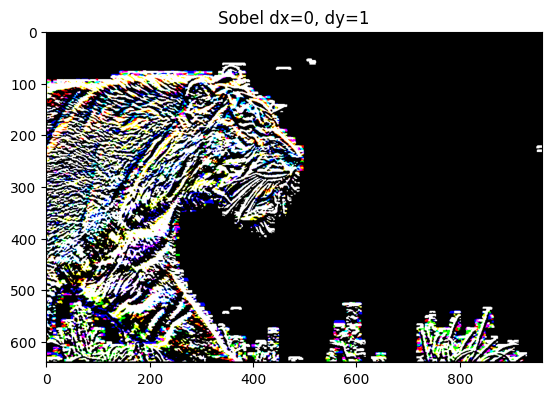

In [25]:
#cv2.Sobel dx=0, dy=1
sob_y = cv2.Sobel(bmg,cv2.CV_64F,0,1,ksize=5)


plt.imshow(sob_y)
plt.title('Sobel dx=0, dy=1')
plt.show()

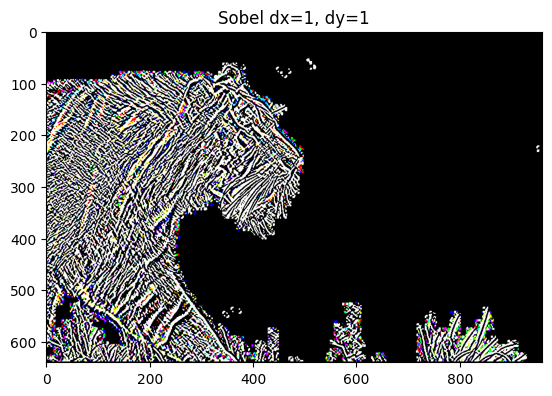

In [26]:
#cv2.Sobel dx=1, dy=1
sob_xy = cv2.Sobel(bmg,cv2.CV_64F,1,1,ksize=5)

plt.imshow(sob_xy)
plt.title('Sobel dx=1, dy=1')
plt.show()

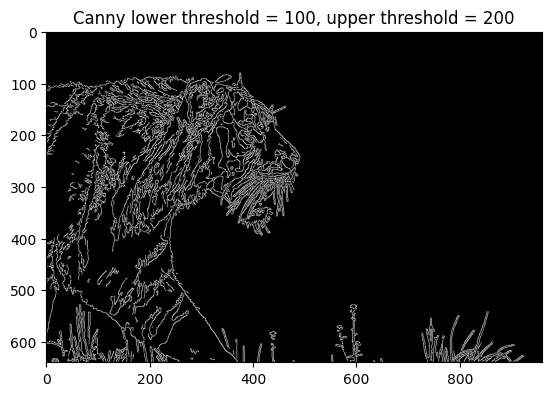

In [27]:
#cv2.Canny
t_L, t_U = (100, 200)

cnny = cv2.Canny(bmg, t_L, t_U)

plt.imshow(cnny, cmap='gray')
plt.title(f'Canny lower threshold = {t_L}, upper threshold = {t_U}')
plt.show()

<br><br><br><br>

# Submit on Blackboard by 12/5/2024 4:30 pm Eastern